***Author: Hanane Nour Moussa***

# **Parks and Recreation Study: Parks in Toronto**


***This notebook contains the step by step analysis conducted to assess the condition of parks in the city of Toronto. This assessment is done on two steps: first determining the boroughs that do not contain any parks and that should be given special consideration, and then assessing visitors' satisfaction with existing parks in the city of Toronto in order to determine the parks that need special attention (revamping, renovation, ...)***

## Table of contents: 

### 1. Obtaining Data about the City of Toronto, its Boroughs, and its Neighborhoods: 
### 2. Obtaining Data about the Venues in Toronto
### 3. Assessing Parks in Toronto





### 1. Obtaining Data about the City of Toronto, its Boroughs, and its Neighborhoods

   **a. Webscraping to create dataframe:**

    First, we will webscrape a wikipidea page that contains a table about neighborhoods and boroughs in Toronto and we will convert its content to a pandas DataFrame. 

In [1]:
#importing dependencies
import pandas as pd #pandas library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np #computing library
import json #to handle json files
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim #convert an address into latitude and longitude values 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  py

In [2]:
#installing dependencies necessary for webscraping
!pip install bs4

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=147bc3f1624bfc09ffde2c3bc3e3c4ec9de23554616a9793df820caee7af1364
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [3]:
from bs4 import BeautifulSoup as bs

In [4]:
#the url of the wikipedia page containing table about toronto neighborhoods
wikiurl = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
#requesting the wikipage
wikipage = requests.get(wikiurl)
#creating a beautiful soup object
soup = bs(wikipage.content, 'html.parser')
#list to store table contents
table_contents=[]
#finding table using table tag
table=soup.find('table')
#finding cells in the table using td tag
for row in table.findAll('td'):
    cell = {}
    #if borough is not assigned, ignore
    if row.span.text=='Not assigned':
        pass
    else:
        #retrieving postal code, borough, and neighborhood(s)
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

#creating dataframe from table contents
df=pd.DataFrame(table_contents)
#replacing long borough names with shorter ones
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
#print dataframe
df.head()


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


We will conduct some intital analysis of our data. Let's see how many neighborhoods there are per borough in Toronto, and plot the results using a bar chart. 

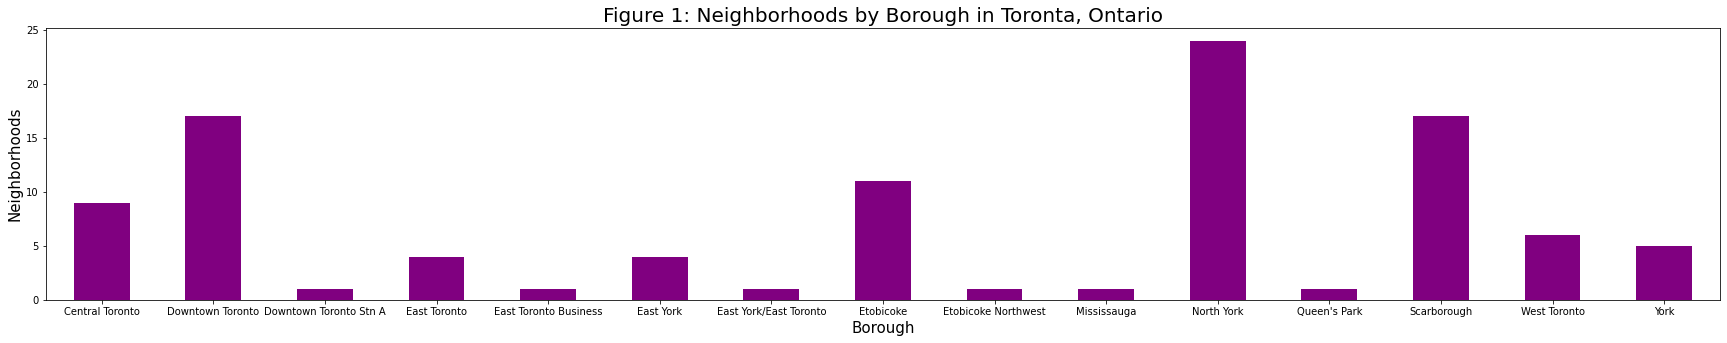

In [5]:
df.groupby('Borough')['Neighborhood'].count().plot.bar(figsize = (30,5), color = "purple")
plt.title('Figure 1: Neighborhoods by Borough in Toronta, Ontario', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Neighborhoods', fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

**b. Getting latitude and longitude of each postal code**

The second part consists of obtaining the geospatial data. Since geocoder gave unreliable results, I have opted for the csv file method. I uploaded the csv file to my IBM coud account and inserted it in code using Search and Add Data => Insert in code ==> pandas Dataframe

In [6]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#adding two columns to df
df['Latitude'] = ''
df['Longitude'] = ''
#resetting the index in df_data_1 for easier processing
df_data_1.set_index('Postal Code', inplace = True)
#filling the latitude and longitude columns of df 
for i in range (0, df.shape[0]): 
    df.loc[i, 'Latitude'] = df_data_1.loc[df.loc[i, 'PostalCode'], 'Latitude']
    df.loc[i, 'Longitude'] = df_data_1.loc[df.loc[i, 'PostalCode'], 'Longitude']
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7533,-79.3297
1,M4A,North York,Victoria Village,43.7259,-79.3156
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
4,M7A,Queen's Park,Ontario Provincial Government,43.6623,-79.3895


### 2. Obtaining Data about Venues in Toronto: 

Now, we will obtain the geospatial coordinates of Toronto that will be used with Foursquare API in order to find venues in Toronto. We will use Folium to plot maps that would visualize our results. 

In [8]:
#geographical coordinates of toronto 
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [9]:
print ('Geospatial coordinates of Toronto, Ontario: {},{}'.format(latitude, longitude))

Geospatial coordinates of Toronto, Ontario: 43.6534817,-79.3839347


Let's visualize Toronto and its neighborhoods using Folium. 

In [10]:
#visualizing Toronto and its neighborhoods
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 10)

#add markers to map
for lat, lng, borough, neighborhood in zip (df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']): 
    label = neighborhood + ' - ' + borough
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5, 
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc', 
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_toronto)
map_toronto
    

Let's use Foursquare API using the client id and client secret.

In [11]:
#Fousquare API credentials
CLIENT_ID = 'C3J4JZK0KPNJ2JRKSEPVMXLNHAAU4PSMJEZHRNFKUY1IJ2QV'
CLIENT_SECRET = 'RN2BRTEC4TTLQO0OC1DI0DOBOGBOT4IEKQU3A5SSLXTWM0SS'
#Foursquare version
VERSION = '20180605'
#default limit
LIMIT = 100


Let's define a function to obtain information about the venues in every neighborhood and store in a dataframe called nearby_venues. 

In [12]:
#function to retrieve information from Foursquare API about each neighborhood in Toronto

def getVenues (names, latitudes, longitudes, radius = 500):
    venues_list = []
    for name, lat, lng in zip (names, latitudes, longitudes):
        print(name)
        
        #construct url
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #make the get request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #retrieve only relevant information
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['id'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 'Venue ID',
                'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#run the function
toronto_venues = getVenues(names = df['Neighborhood'], latitudes=df['Latitude'], longitudes = df['Longitude'])


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [13]:
#let's check last 5 rows of the dataframe
toronto_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
2129,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Jim & Maria's No Frills,4b4a2c3ff964a520507d26e3,43.631152,-79.518617,Grocery Store
2130,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Royal Canadian Legion #210,50775788e4b0b61558fb5e57,43.628855,-79.518903,Social Club
2131,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,4c2e6d1d16adc928d3debb9c,43.631370,-79.519006,Tanning Salon
2132,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Value Village,59023da39746172d9dea9b60,43.631269,-79.518238,Thrift / Vintage Store
2133,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,4c8821e9bbec6dcb7b93d158,43.627254,-79.526684,Gym


In [14]:
#let's check how many unique venue categories there are
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 274 uniques categories.


In [15]:
#What are these venue categories?
print("The venue categories are", toronto_venues['Venue Category'].unique())

The venue categories are ['Park' 'Fast Food Restaurant' 'Food & Drink Shop' 'Hockey Arena'
 'Coffee Shop' 'Portuguese Restaurant' 'Pizza Place' 'Bakery'
 'Distribution Center' 'Restaurant' 'Spa' 'Gym / Fitness Center' 'Pub'
 'Breakfast Spot' 'Historic Site' 'Chocolate Shop' 'Farmers Market'
 'Performing Arts Venue' 'Dessert Shop' 'French Restaurant'
 'Mexican Restaurant' 'Theater' 'Yoga Studio' 'Shoe Store' 'Event Space'
 'Café' 'Asian Restaurant' 'Electronics Store' 'Art Gallery' 'Bank'
 'Beer Store' 'Health Food Store' 'Antique Shop' 'Playground' 'Boutique'
 'Furniture / Home Store' 'Vietnamese Restaurant' 'Clothing Store'
 'Accessories Store' 'Arts & Crafts Store' 'Miscellaneous Shop'
 'Italian Restaurant' 'Beer Bar' 'Sushi Restaurant' 'Creperie'
 'Burrito Place' 'Fried Chicken Joint' 'Hobby Shop' 'Diner'
 'Japanese Restaurant' 'Smoothie Shop' 'Sandwich Place' 'Gym'
 'College Auditorium' 'Bar' 'Music Venue' 'Caribbean Restaurant'
 'Athletics & Sports' 'Gastropub' 'Pharmacy' 'Pet Sto

### 3. Assessing Parks in Toronto: 

Now let's focus on parks. 

In [16]:
#let's keep neighborhoods that have parks
park_neighborhoods = toronto_venues[toronto_venues['Venue Category'] == 'Park']
park_neighborhoods

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,4e8d9dcdd5fbbbb6b3003c7b,43.751976,-79.332140,Park
12,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,51ccc048498ec7792efc955e,43.655618,-79.356211,Park
25,"Regent Park, Harbourfront",43.654260,-79.360636,Underpass Park,4ddfbaca185035f3a44e8df6,43.655764,-79.354806,Park
36,"Regent Park, Harbourfront",43.654260,-79.360636,Parliament Square Park,4c16a548955976b0cadea4f6,43.650264,-79.362195,Park
63,Ontario Provincial Government,43.662301,-79.389494,Queen's Park,4b9d206bf964a520e69136e3,43.663946,-79.392180,Park
165,"Garden District, Ryerson",43.657162,-79.378937,College Park Area,4c8facf91664b1f79c90aa2f,43.659453,-79.383785,Park
217,Glencairn,43.709577,-79.445073,Fraserwood Park,4e8eec51f9f4680c30c6968b,43.713550,-79.442482,Park
243,Woodbine Heights,43.695344,-79.318389,Stan Wadlow Park,4c012a56efa2ef3b516daa8c,43.697836,-79.314303,Park
268,St. James Town,43.651494,-79.375418,Berczy Park,4bb79860cf2fc9b616779e02,43.648048,-79.375172,Park
278,St. James Town,43.651494,-79.375418,St. James Park,4bb3b268eb3e9521cd82cb0a,43.650425,-79.372311,Park


In [17]:
#let's see how many parks there are in toronto
park_neighborhoods.shape

(52, 8)

There are 52 parks in Toronto. 

In [18]:
#bringing borough column back in
temp = df.drop(['PostalCode', 'Latitude', 'Longitude'], axis = 1)
park_merged = park_neighborhoods
park_merged = park_merged.join(temp.set_index('Neighborhood'), on = 'Neighborhood')
park_merged

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,4e8d9dcdd5fbbbb6b3003c7b,43.751976,-79.332140,Park,North York
12,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,51ccc048498ec7792efc955e,43.655618,-79.356211,Park,Downtown Toronto
25,"Regent Park, Harbourfront",43.654260,-79.360636,Underpass Park,4ddfbaca185035f3a44e8df6,43.655764,-79.354806,Park,Downtown Toronto
36,"Regent Park, Harbourfront",43.654260,-79.360636,Parliament Square Park,4c16a548955976b0cadea4f6,43.650264,-79.362195,Park,Downtown Toronto
63,Ontario Provincial Government,43.662301,-79.389494,Queen's Park,4b9d206bf964a520e69136e3,43.663946,-79.392180,Park,Queen's Park
165,"Garden District, Ryerson",43.657162,-79.378937,College Park Area,4c8facf91664b1f79c90aa2f,43.659453,-79.383785,Park,Downtown Toronto
217,Glencairn,43.709577,-79.445073,Fraserwood Park,4e8eec51f9f4680c30c6968b,43.713550,-79.442482,Park,North York
243,Woodbine Heights,43.695344,-79.318389,Stan Wadlow Park,4c012a56efa2ef3b516daa8c,43.697836,-79.314303,Park,East York
268,St. James Town,43.651494,-79.375418,Berczy Park,4bb79860cf2fc9b616779e02,43.648048,-79.375172,Park,Downtown Toronto
278,St. James Town,43.651494,-79.375418,St. James Park,4bb3b268eb3e9521cd82cb0a,43.650425,-79.372311,Park,Downtown Toronto


In [19]:
#let's move the Borough column to the beginning
first_column = park_merged.pop('Borough')
park_merged.insert(0, 'Borough', first_column)
park_merged

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,4e8d9dcdd5fbbbb6b3003c7b,43.751976,-79.332140,Park
12,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,51ccc048498ec7792efc955e,43.655618,-79.356211,Park
25,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Underpass Park,4ddfbaca185035f3a44e8df6,43.655764,-79.354806,Park
36,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Parliament Square Park,4c16a548955976b0cadea4f6,43.650264,-79.362195,Park
63,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,Queen's Park,4b9d206bf964a520e69136e3,43.663946,-79.392180,Park
165,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,College Park Area,4c8facf91664b1f79c90aa2f,43.659453,-79.383785,Park
217,North York,Glencairn,43.709577,-79.445073,Fraserwood Park,4e8eec51f9f4680c30c6968b,43.713550,-79.442482,Park
243,East York,Woodbine Heights,43.695344,-79.318389,Stan Wadlow Park,4c012a56efa2ef3b516daa8c,43.697836,-79.314303,Park
268,Downtown Toronto,St. James Town,43.651494,-79.375418,Berczy Park,4bb79860cf2fc9b616779e02,43.648048,-79.375172,Park
278,Downtown Toronto,St. James Town,43.651494,-79.375418,St. James Park,4bb3b268eb3e9521cd82cb0a,43.650425,-79.372311,Park


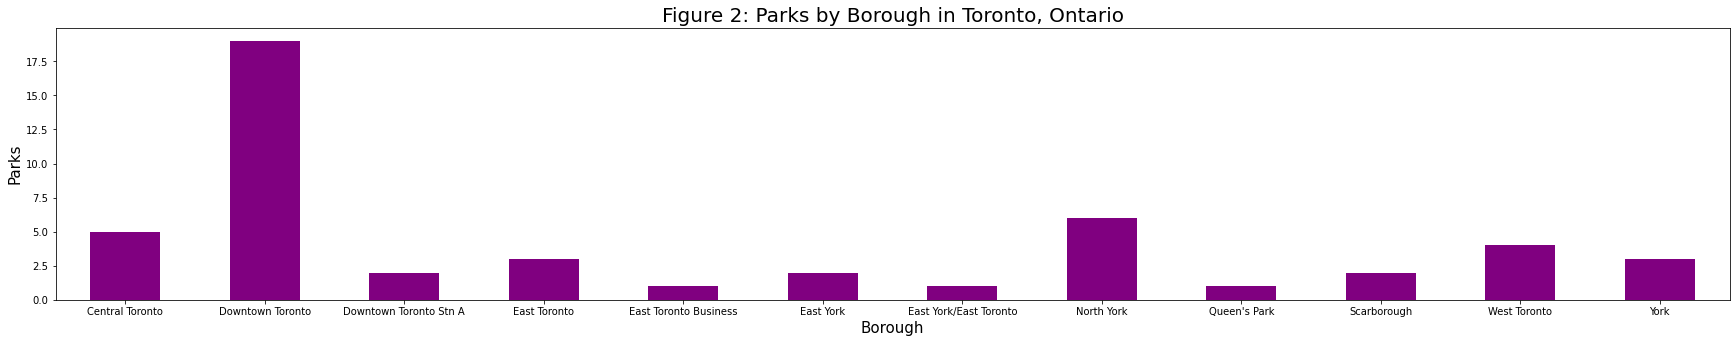

In [67]:
#parks per borough in toronto 
park_merged.groupby('Borough')['Venue'].count().plot.bar(figsize = (30,5), color = "purple")
plt.title("Figure 2: Parks by Borough in Toronto, Ontario", fontsize = 20)
plt.xlabel("Borough", fontsize = 15)
plt.ylabel("Parks", fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [21]:
#these are the neighborhoods/boroughs that have parks, what about those that don't
print(set(df['Borough'].unique()).difference(set(park_merged['Borough'].unique())))


{'Mississauga', 'Etobicoke Northwest'}


It turns out that Mississauga and Etobicoke Northwest are the two boroughs that do not contain any parks, thus it is advisable for the parks and recreation department to give these boroughs special considerations. 

Now, let's examine visitors' satisfaction with Toronto's existing 52 parks. 

Let's visualize the parks in Toronto

In [74]:
#visualizing Toronto and its parks
map_toronto_parks = folium.Map(location = [latitude, longitude], zoom_start = 10)

#add markers to map
for lat, lng, venue in zip (park_merged['Venue Latitude'], park_merged['Venue Longitude'], park_merged['Venue']): 
    label = venue
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5, 
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc', 
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_toronto_parks)
map_toronto_parks

Let's obtain details about each park in Toronto using Foursquare API. Let's define a function, get_venue_details for this purpose. 

In [23]:
def get_venue_details (ids):
    details_list = []
    for Id in ids:
        print(Id)
        #construct url
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            Id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
        #make the get request 
        results = requests.get(url).json()['response']
        print(results)
        #retrieve only relevant information
        try: 
            venue_id = results['venue']['id']
            venue_likes = results['venue']['likes']['count']
            venue_rating = results['venue']['rating']
            details_list.append([venue_id, venue_likes,venue_rating])
        except KeyError: 
            pass
        columns_names = ['Venue ID', 'Venue Likes', 'Venue Rating']
        nearby_venues = pd.DataFrame(details_list, columns = columns_names)
    
    return(nearby_venues)

In [29]:
park_merged.drop([park_merged.index[30],park_merged.index[40],park_merged.index[49]], axis =  0, inplace = True)
park_merged.shape

(49, 9)

In [30]:
#due to quota issue with Foursquare make sure to lower the number of parks to 50
#delete a few rows 
park_details = get_venue_details(park_merged['Venue ID'])
park_details

4e8d9dcdd5fbbbb6b3003c7b
{'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b', 'name': 'Brookbanks Park', 'contact': {}, 'location': {'address': 'Toronto', 'lat': 43.751976046055574, 'lng': -79.33214044722958, 'labeledLatLngs': [{'label': 'display', 'lat': 43.751976046055574, 'lng': -79.33214044722958}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/brookbanks-park/4e8d9dcdd5fbbbb6b3003c7b', 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d165941735', 'name': 'Scenic Lookout', 'pluralName': 'Scenic Lookouts', 'shortName': 'Scenic Lookout', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/sceniclookout_', 'suffix': '.png'}}], 'verified': True, 'stats': 

,Venue ID,Venue Likes,Venue Rating
0,4e8d9dcdd5fbbbb6b3003c7b,12,6.9
1,51ccc048498ec7792efc955e,45,8.6
2,4ddfbaca185035f3a44e8df6,29,9.0
3,4c16a548955976b0cadea4f6,16,7.9
4,4b9d206bf964a520e69136e3,172,8.6
5,4c8facf91664b1f79c90aa2f,10,8.3
6,4c012a56efa2ef3b516daa8c,5,5.9
7,4bb79860cf2fc9b616779e02,25,8.6
8,4bb3b268eb3e9521cd82cb0a,67,7.6
9,4bb79860cf2fc9b616779e02,25,8.6


In [31]:
park_details.describe()

,Venue Likes,Venue Rating
count,29.000000,29.000000
mean,52.758621,8.124138
std,97.320404,0.814448
min,4.000000,5.900000
25%,12.000000,7.600000
50%,25.000000,8.300000
75%,45.000000,8.600000
max,520.000000,9.300000


Let's Convert Likes to float for better processing. 

In [43]:
park_details['Venue Likes'] = park_details['Venue Likes'].astype('float64')


In [44]:
print("Park with best rating:\n ", park_details.iloc[park_details['Venue Rating'].idxmax()])
print("Park with best Likes: \n",park_details.iloc[park_details['Venue Likes'].idxmax()])

Park with best rating:
  Venue ID        4e49413e81dc766f3e3d6312
Venue Likes                          109
Venue Rating                         9.3
Name: 14, dtype: object
Park with best Likes: 
 Venue ID        4ad4c05ef964a520bdf620e3
Venue Likes                          520
Venue Rating                         9.3
Name: 15, dtype: object


In [49]:
#merge park_details with park_merge
temp = park_merged
temp = temp.join(park_details.set_index('Venue ID'), on = 'Venue ID')
temp.shape

(65, 11)

In [53]:
#let's drop rows with NaN rating
temp.dropna(subset = ['Venue Rating'], inplace = True)
temp.shape

(45, 11)

20 rows with NaN Rating have been removed, let's analyze the remaining rows. 

Let's see the average rating of parks per borough, in descending order

In [61]:
park_final = temp.groupby('Borough', as_index = False).mean()[['Borough', 'Venue Rating']]
park_final.columns = ['Borough', 'Average Rating']
park_final.sort_values(['Average Rating'], ascending = False, inplace = True)
park_final

,Borough,Average Rating
6,Queen's Park,8.600000
0,Central Toronto,8.375000
1,Downtown Toronto,8.374074
2,Downtown Toronto Stn A,8.266667
7,West Toronto,8.100000
3,East Toronto,7.850000
5,North York,6.900000
4,East York,5.900000


It turns out that Queen's Park has the best ratings and East York has the worst. Let's visualize this result. 

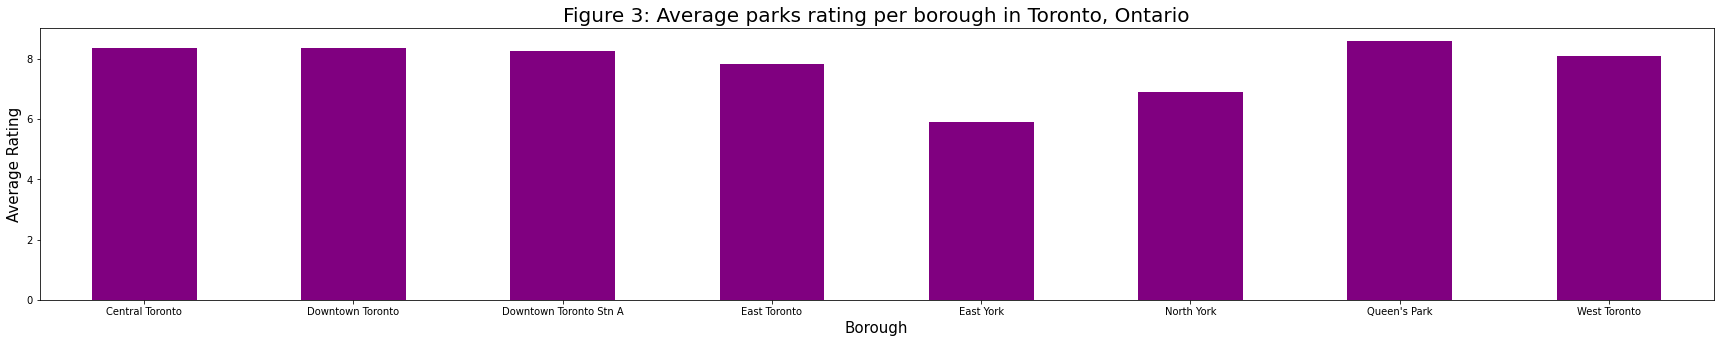

In [66]:
#visualize the results
plt.figure(figsize = (30,5))
temp.groupby('Borough').mean()['Venue Rating'].plot.bar(color = "purple") 
plt.xlabel("Borough", fontsize = 15)
plt.ylabel("Average Rating", fontsize = 15)
plt.title("Figure 3: Average parks rating per borough in Toronto, Ontario", fontsize = 20)
plt.xticks(rotation = 'horizontal')
plt.show()

The analysis performed in this project thus leads to the following conclusions, in order to enhance the condition of parks in Toronto: 
1. The boroughs of Mississauga and Etobicoke Northwest do not contain any parks and should be given special attention in order to enhance the surroundings of its dwellers
2. The distribution of parks does necessarily conform to the distribution of neighborhoods. For example, North York has a high number of neighborhoods compared to other boroughs, but it has fewer parks compared to other boroughs. 
3. The elevated number of parks in a certain borough does not necessarily translate into higher rating: Queen's park has the highest average rating although it has among the least number of parks
4. The parks in the boroughs with the lowest ratings, such as East Toronto, North York, and East York should be given special attention in terms of renovation and revamping. 


Thank you for reading this notebook! For detailed analysis and discussion, please check out my report! 